In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor 


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv('/content/drive/MyDrive/dataset_osrm.csv')

In [3]:
data.head()

,Unnamed: 0,sourceid,dstid,dow,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,lng,lat,dropoff_lng,dropoff_lat,distance
0,1,705,167,7,1699.27,599.75,1620.96,1.34,-0.108597,51.572449,-0.09058,51.604151,5070
1,2,705,167,2,1856.69,589.44,1774.34,1.34,-0.108597,51.572449,-0.09058,51.604151,5070
2,3,705,167,5,1768.07,612.67,1687.55,1.33,-0.108597,51.572449,-0.09058,51.604151,5070
3,4,705,167,6,1694.18,475.83,1634.71,1.30,-0.108597,51.572449,-0.09058,51.604151,5070
4,5,705,167,4,1797.06,533.16,1731.18,1.30,-0.108597,51.572449,-0.09058,51.604151,5070


In [4]:
#checking for null values
data.isnull().sum()

Unnamed: 0                                  0
sourceid                                    0
dstid                                       0
dow                                         0
mean_travel_time                            0
standard_deviation_travel_time              0
geometric_mean_travel_time                  0
geometric_standard_deviation_travel_time    0
lng                                         0
lat                                         0
dropoff_lng                                 0
dropoff_lat                                 0
distance                                    0
dtype: int64

In [5]:
#dropping unnamed column 

data = data.drop(columns = data.columns[0])

In [6]:
data.head(2)

,sourceid,dstid,dow,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,lng,lat,dropoff_lng,dropoff_lat,distance
0,705,167,7,1699.27,599.75,1620.96,1.34,-0.108597,51.572449,-0.09058,51.604151,5070
1,705,167,2,1856.69,589.44,1774.34,1.34,-0.108597,51.572449,-0.09058,51.604151,5070


In [9]:
#initializing minmaxscaler
#minmaxscaler used as it speeds up the training process but does not interfere with results
mms = MinMaxScaler()

In [10]:
#performing Minmaxscaling
df_test = pd.DataFrame(mms.fit_transform(data), columns = [data.columns])

In [11]:
df_test.head()

,sourceid,dstid,dow,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,lng,lat,dropoff_lng,dropoff_lat,distance
0,0.717635,0.169215,1.000000,0.261501,0.160549,0.257408,0.030189,0.483799,0.719584,0.506945,0.80376,0.047886
1,0.717635,0.169215,0.166667,0.286203,0.157724,0.281875,0.030189,0.483799,0.719584,0.506945,0.80376,0.047886
2,0.717635,0.169215,0.666667,0.272297,0.164091,0.268031,0.029245,0.483799,0.719584,0.506945,0.80376,0.047886
3,0.717635,0.169215,0.833333,0.260702,0.126585,0.259602,0.026415,0.483799,0.719584,0.506945,0.80376,0.047886
4,0.717635,0.169215,0.500000,0.276846,0.142298,0.274990,0.026415,0.483799,0.719584,0.506945,0.80376,0.047886


In [12]:

x = df_test.loc[:, df_test.columns != 'mean_travel_time']
y = df_test[['mean_travel_time']]

In [13]:
y.shape

(2881559, 1)

In [15]:
#splitting dataset by 70:30, 70% for training and 30% for testing
x_train, x_test, y_train, y_test = train_test_split(x , y, train_size = 0.7, random_state = 42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2017091, 12)
(864468, 12)
(2017091, 1)
(864468, 1)


<h1>SVM

In [17]:
svm = SVR(verbose=1)
svm.fit(x_train,y_train.values.ravel())

[LibSVM]

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=1)

In [18]:
svm_pred = svm.predict(x_test)

In [20]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, svm_pred)))
print("R2 Score: ", r2_score(y_test,svm_pred))


RMSE:  0.042641504727437066
R2 Score:  0.8730421823221928


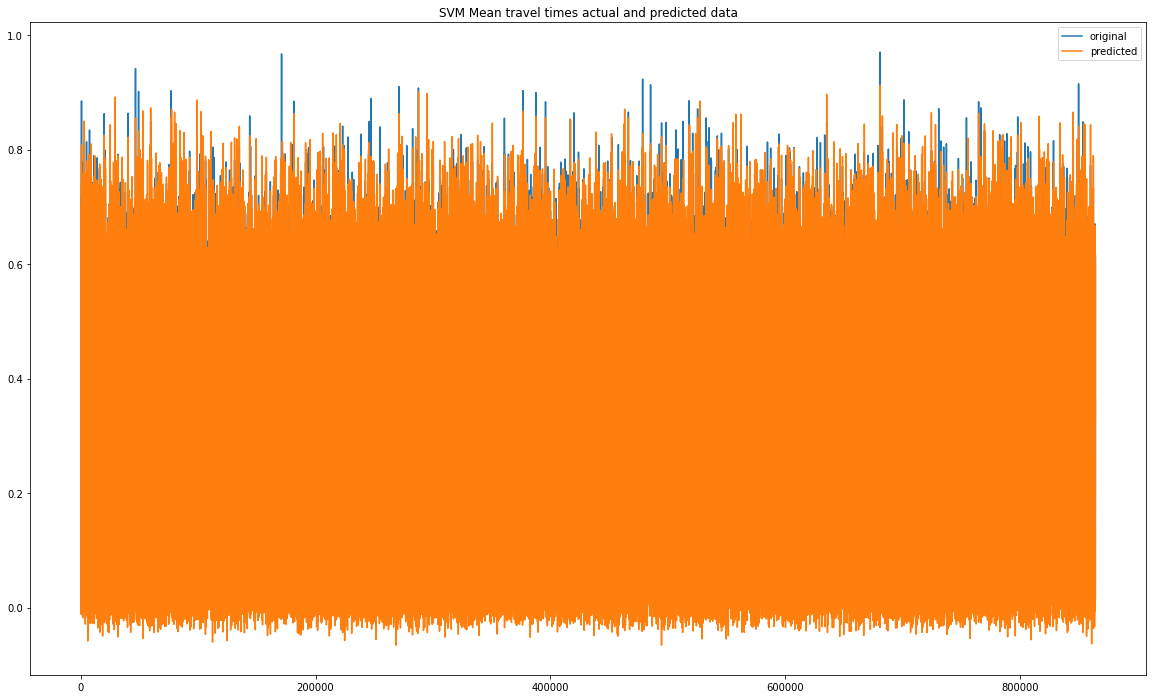

In [22]:
plt.figure(figsize=(20,12))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, svm_pred, label="predicted")

plt.title("SVM Mean travel times actual and predicted data")

plt.legend()
plt.show()

<h1> RANDOM FOREST

In [27]:
rfr = RandomForestRegressor(verbose=1)
rfr.fit(x_train,y_train.values.ravel())


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 28.6min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=1, warm_start=False)

In [29]:
rfr_pred = rfr.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.9s finished


In [30]:
print("RANDOM FOREST")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, rfr_pred)))
print("R2 Score: ", r2_score(y_test, rfr_pred))

RANDOM FOREST
RMSE:  9.657201465717274e-05
R2 Score:  0.9999993488260948


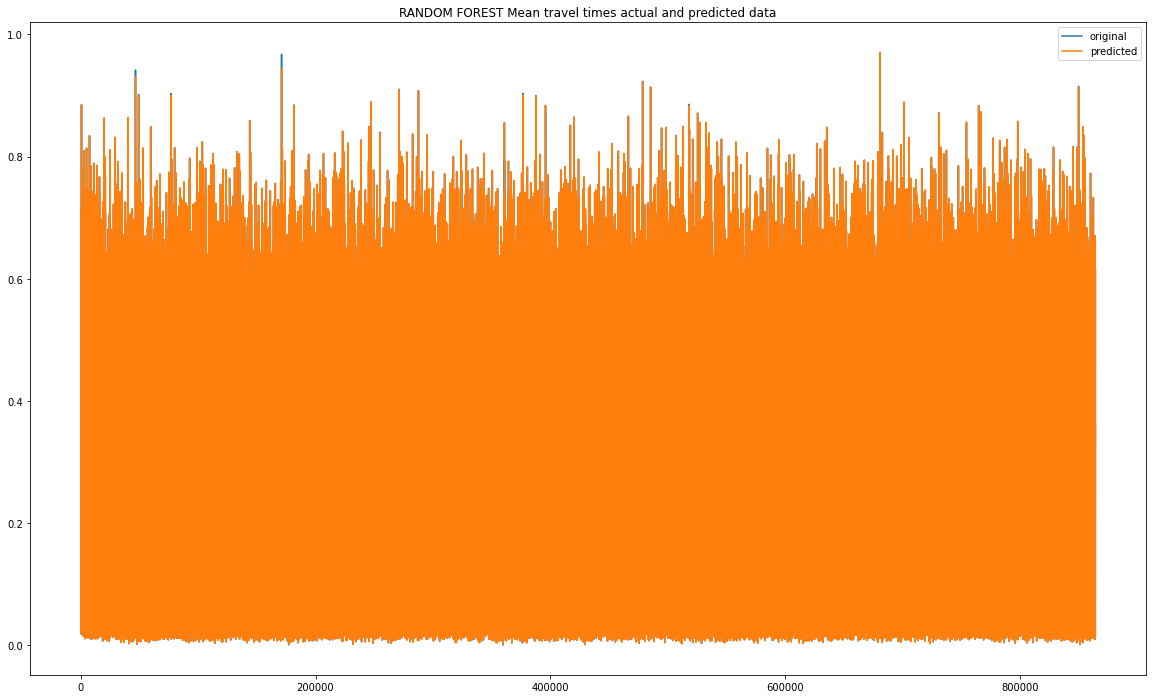

In [31]:
plt.figure(figsize=(20,12))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, rfr_pred, label="predicted")

plt.title("RANDOM FOREST Mean travel times actual and predicted data")

plt.legend()
plt.show()

In [39]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [40]:
knn_pred = knn.predict(x_test)

In [41]:
print("KNN")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, knn_pred)))
print("R2 Score: ", r2_score(y_test, knn_pred))

KNN
RMSE:  0.015500338666421984
R2 Score:  0.9832244495403833


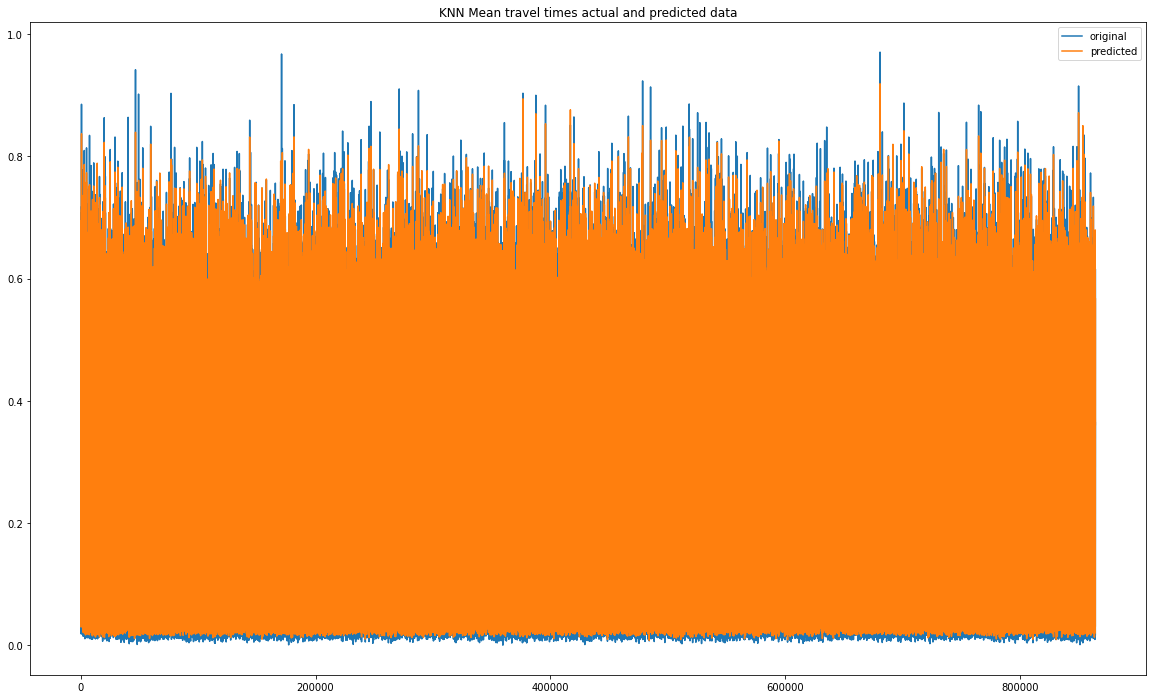

In [42]:
plt.figure(figsize=(20,12))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, knn_pred, label="predicted")

plt.title("KNN Mean travel times actual and predicted data")

plt.legend()
plt.show()

<h1>XGBoost



In [45]:
xgbr = XGBRegressor(objective ='reg:squarederror')
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [46]:
xgbr_pred = xgbr.predict(x_test)

In [47]:
print("XGBoost")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, xgbr_pred)))
print("R2 Score: ", r2_score(y_test, xgbr_pred))

XGBoost
RMSE:  0.0011536952486091998
R2 Score:  0.9999070655756044


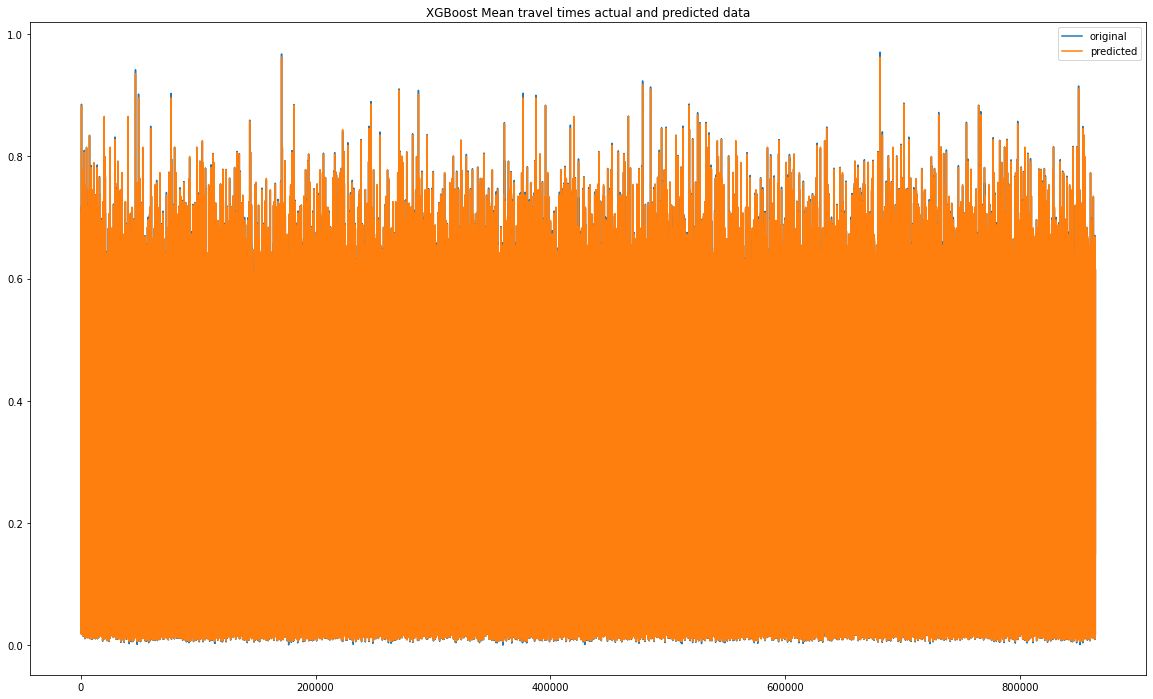

In [48]:
plt.figure(figsize=(20,12))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, xgbr_pred, label="predicted")

plt.title("XGBoost Mean travel times actual and predicted data")

plt.legend()
plt.show()

<h1>LIGHTGBM

In [64]:
import lightgbm as lgb

In [73]:
#converting dataframes to array as lightgbm was producing an error with dataframes
lgbm = LGBMRegressor()
lgbm.fit(np.array(x_train), np.array(y_train.ravel()))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [77]:
lgbm_pred = lgbm.predict(np.array(x_test))

In [79]:
print("LightGBM")
print("RMSE: ", np.sqrt(mean_squared_error(np.array(y_test), lgbm_pred)))
print("R2 Score: ", r2_score(np.array(y_test), lgbm_pred))

XGBoost
RMSE:  0.0022471837191194474
R2 Score:  0.9996474087221607


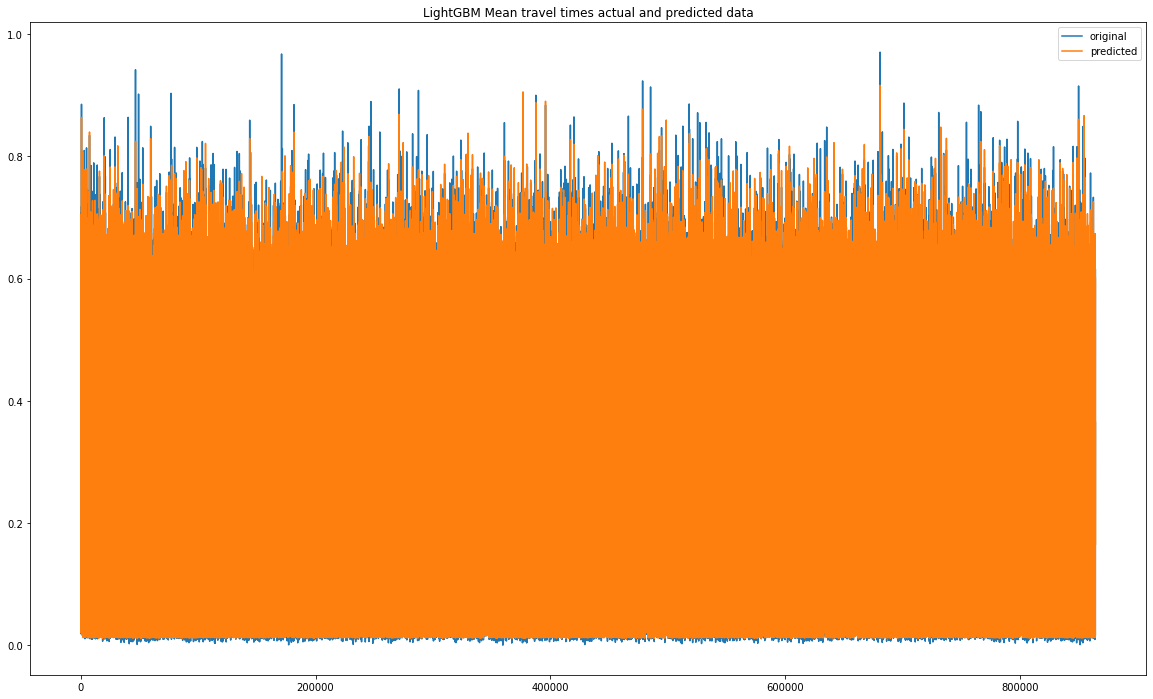

In [80]:
plt.figure(figsize=(20,12))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, lgbm_pred, label="predicted")

plt.title("LightGBM Mean travel times actual and predicted data")

plt.legend()
plt.show()